## SQL Data Project 
GitHub: @guzmanwolfrank 



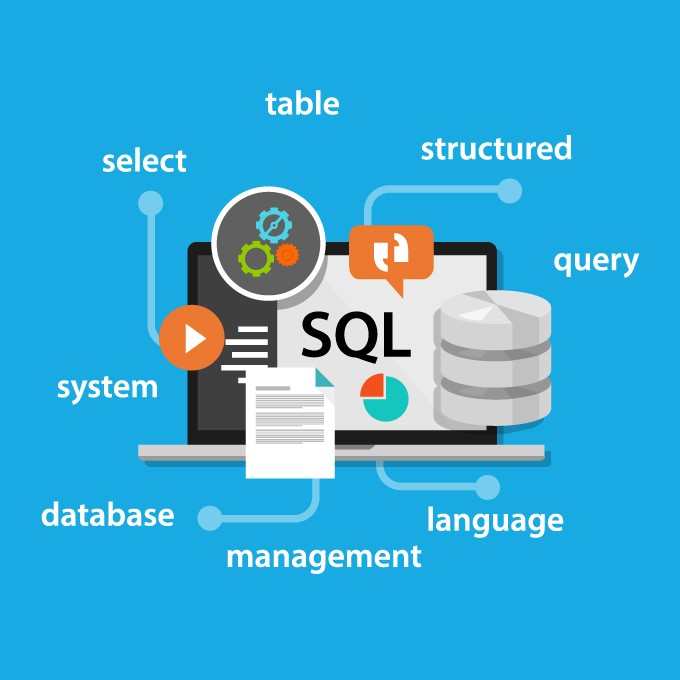

In this project we will run SQL queries on a database to resolve questions about a backtest and its results. 



In [1]:
import pandas as pd
import sqlite3
import seaborn as sns 
import matplotlib.pyplot as plt   

# Define the local file path
csv_file_path = r'C:\Users\Wolfrank\Desktop\SQLiteProj\sdf - sdf.csv'

# Load the CSV data into a pandas DataFrame
sdf = pd.read_csv(csv_file_path)

df = sdf.round()

# Define the SQLite database name
db_name = "AlgoSQL.db"

# Create a connection to the SQLite database
conn = sqlite3.connect(db_name)

# Write the DataFrame to the SQLite database
df.to_sql('algotable', conn, if_exists='replace', index=False)

# Close the database connection
conn.close()

# Reconnect to the database for querying
conn = sqlite3.connect(db_name)

# Sample query: Find the maximum value in the 'close' column
SQL = "SELECT MAX(close) FROM algotable"

# Execute the query and fetch the result
max_close = conn.execute(SQL).fetchone()[0]

# Close the database connection
#conn.close()

# Print the result
print(f"The maximum value in the 'close' column is: {max_close}")


The maximum value in the 'close' column is: 85.0


What was the most money made in any particular trade? 

In [2]:
# Query:  Find the maximum value in the 'strat_profits' column 
SQL = "SELECT MAX(strat_profits) From algotable"


# Execute the query and fetch the result 
max_profits = conn.execute(SQL).fetchone()[0]

#Print the result
print('The most money made on any one trade was:  $',max_profits)

The most money made on any one trade was:  $ 4780


When did this trade occur? 

In [3]:
# Find the row with the maximum Strat_Profits value
max_profit_row = df[df['Strat_Profits'] == df['Strat_Profits'].max()]

# Extract the date from the row
date_of_max_profit = max_profit_row['Date'].values[0]

print("Date corresponding to the maximum profit trade:", date_of_max_profit)

Date corresponding to the maximum profit trade: 2022-01-31


In [4]:


# 1. What is the overall return percentage of the strategy based on the backtest results?
SQL = "SELECT Strat_Profits FROM algotable ORDER BY Date DESC LIMIT 1"
result = conn.execute(SQL).fetchone()
overall_return = result[0]
print(f"1. The overall return percentage of the strategy is: {overall_return:.2f}%\n")


1. The overall return percentage of the strategy is: 600.00%



In [5]:

# 2. How does the strategy's return percentage compare to the benchmark or market average?
SQL = "SELECT Strat_Balance, bhBalance FROM algotable ORDER BY Date DESC LIMIT 1"
result = conn.execute(SQL).fetchone()
strategy_return, benchmark_return = result
comparison = strategy_return - benchmark_return
print(f"2. The strategy's return is $ {comparison:.2f} {'higher' if comparison > 0 else 'lower'} than the benchmark.\n")


2. The strategy's return is $ 32720.00 higher than the benchmark.



In [6]:
print ('The benchmark return amount was: $ ', benchmark_return)

The benchmark return amount was: $  41000


In [7]:
print('While the backtest strategy return amount was: $', strategy_return)

While the backtest strategy return amount was: $ 73720


In [8]:

# 4. Can you provide a breakdown of the strategy's performance over different time intervals (e.g., monthly or yearly)?
SQL = """
    SELECT strftime('%Y-%m', Date) AS Month, SUM(Strat_Profits) AS Monthly_Profit
    FROM algotable
    GROUP BY Month
    ORDER BY Month
"""
monthly_performance = conn.execute(SQL).fetchall()
print("4. Monthly Performance Breakdown:")
for month, profit in monthly_performance:
    print(f"In {month}, the strategy's profit was {profit:.2f}")
print()


4. Monthly Performance Breakdown:
In 2020-07, the strategy's profit was 1940.00
In 2020-08, the strategy's profit was -40.00
In 2020-09, the strategy's profit was 110.00
In 2020-11, the strategy's profit was 1120.00
In 2020-12, the strategy's profit was 320.00
In 2021-01, the strategy's profit was 2300.00
In 2021-02, the strategy's profit was 970.00
In 2021-03, the strategy's profit was 1030.00
In 2021-04, the strategy's profit was 960.00
In 2021-05, the strategy's profit was 2000.00
In 2021-06, the strategy's profit was 1680.00
In 2021-07, the strategy's profit was 1150.00
In 2021-08, the strategy's profit was 3680.00
In 2021-09, the strategy's profit was 1530.00
In 2021-10, the strategy's profit was -30.00
In 2021-11, the strategy's profit was -760.00
In 2021-12, the strategy's profit was 3980.00
In 2022-01, the strategy's profit was 4780.00
In 2022-02, the strategy's profit was 2000.00
In 2022-03, the strategy's profit was 5040.00
In 2022-05, the strategy's profit was 1990.00
In 202

Here is the strategy's balance shown in seaborn. 

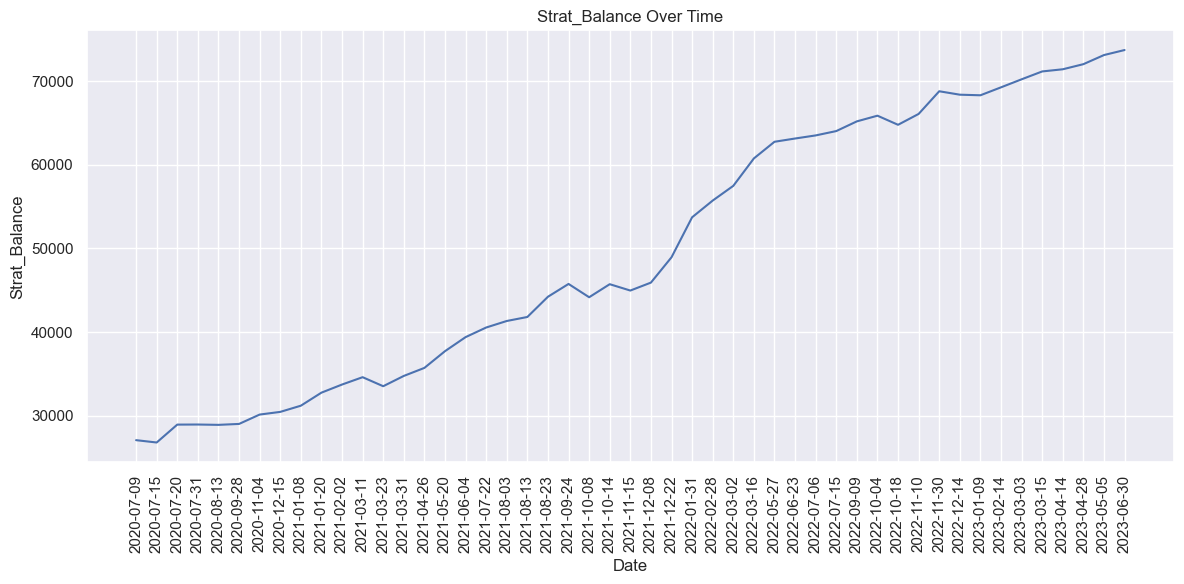

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot (optional)
sns.set(style="darkgrid")

# Create the line chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.lineplot(data=df, x='Date', y='Strat_Balance')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Strat_Balance')
plt.title('Strat_Balance Over Time')

# Show the plot
plt.tight_layout()  # Ensures the labels and title fit within the plot area
plt.show()


In [10]:
# Find the row with the maximum Strat_Profits value
max_profit_row = df[df['Strat_Profits'] == df['Strat_Profits'].max()]

# Extract the date from the row
date_of_max_profit = max_profit_row['Date'].values[0]

print("Date corresponding to the maximum profit trade:", date_of_max_profit)


Date corresponding to the maximum profit trade: 2022-01-31


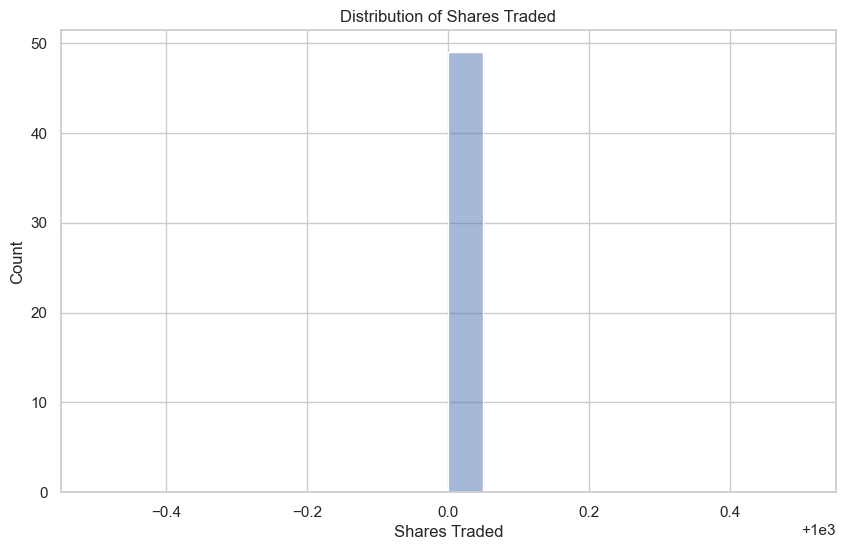

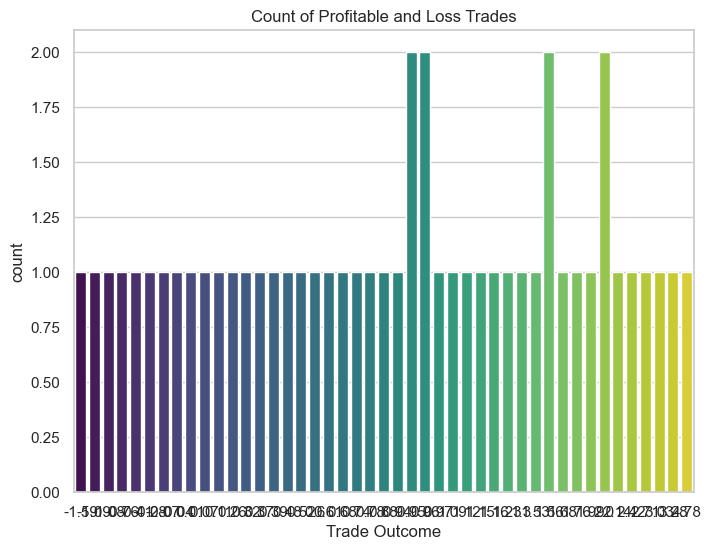

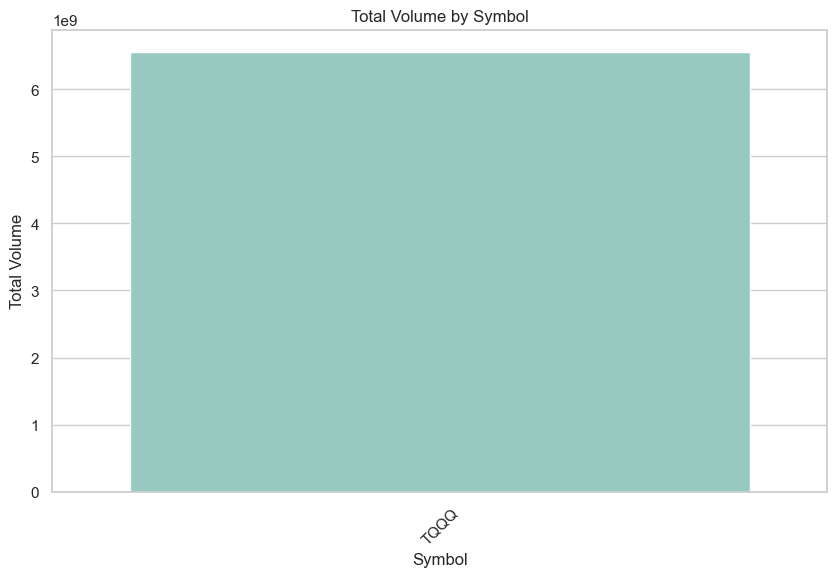

c:\Users\Wolfrank\Desktop\CodeWolf\inprogress\.data\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


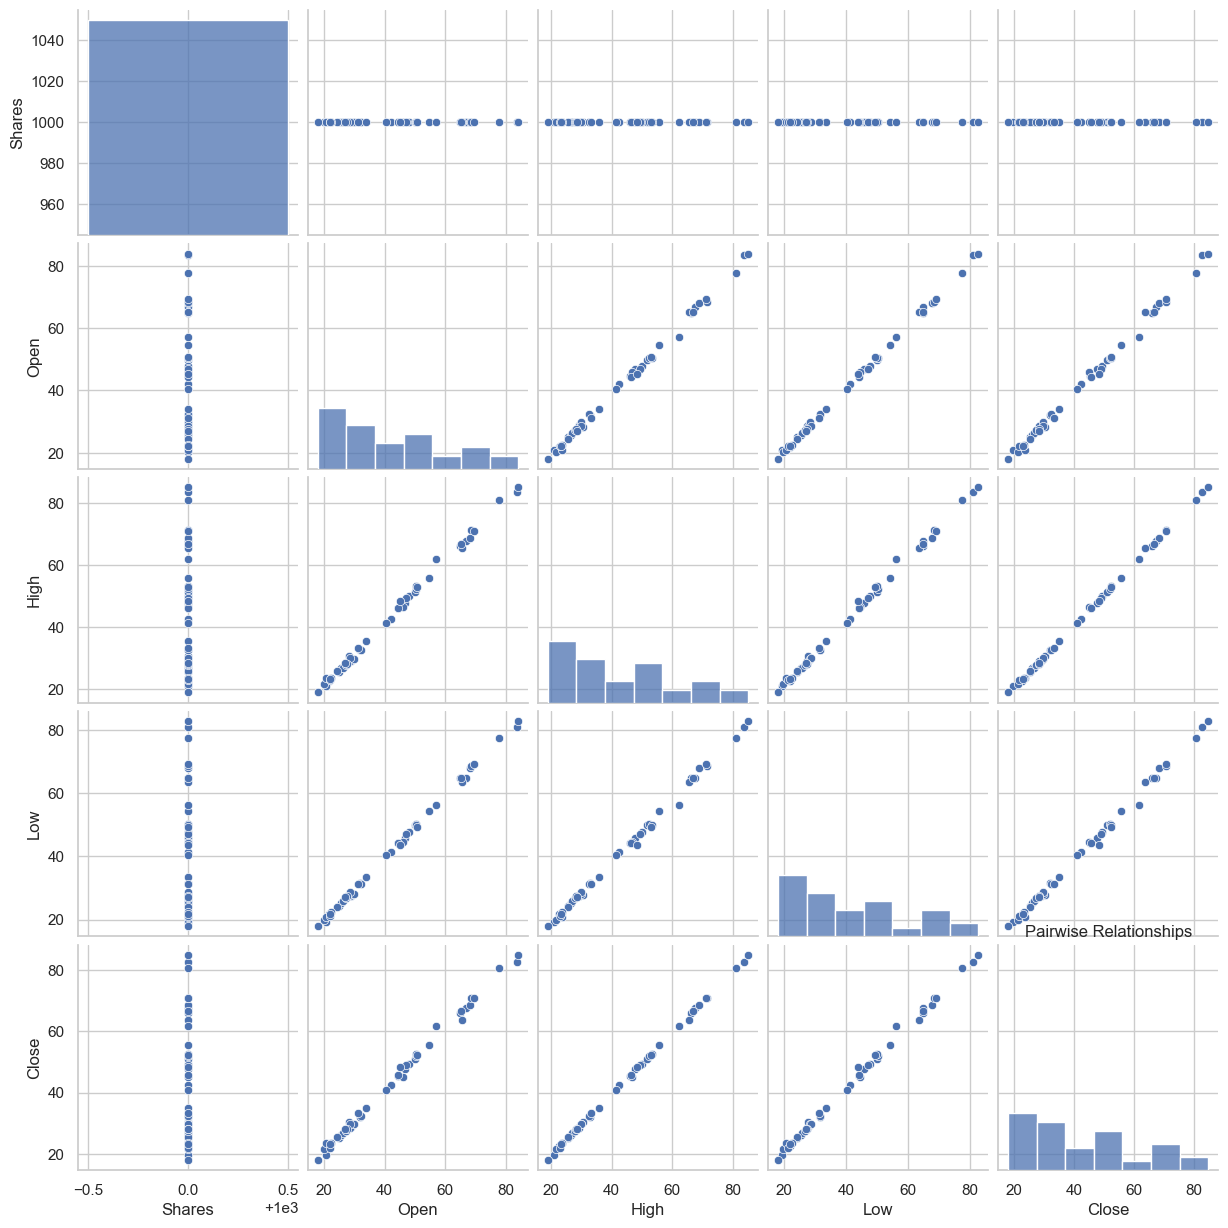

c:\Users\Wolfrank\Desktop\CodeWolf\inprogress\.data\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


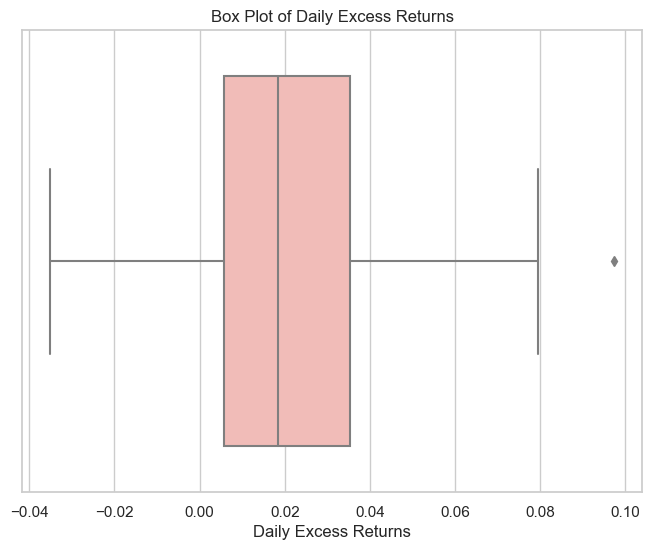

Sample Trades Data:
    Tradeno        Date  Shares Symbol   Open   High    Low  Close     Volume  \
0         4  2020-07-09    1000   TQQQ  28.85  29.17  27.47  28.92  158798000   
1         8  2020-07-15    1000   TQQQ  28.72  29.06  27.35  28.44  183772000   
2        11  2020-07-20    1000   TQQQ  28.20  30.56  27.77  30.34  125810800   
3        20  2020-07-31    1000   TQQQ  29.83  29.88  28.22  29.84  179907600   
4        29  2020-08-13    1000   TQQQ  32.02  32.79  31.63  31.98  117140800   
5        60  2020-09-28    1000   TQQQ  32.32  32.50  31.39  32.43  136665600   
6        87  2020-11-04    1000   TQQQ  33.90  35.66  33.33  35.02  169187600   
7       115  2020-12-15    1000   TQQQ  42.15  42.50  41.23  42.47   78708800   
8       131  2021-01-08    1000   TQQQ  46.83  47.72  45.85  47.57   76407600   
9       138  2021-01-20    1000   TQQQ  47.93  49.94  47.76  49.49   60868000   
10      147  2021-02-02    1000   TQQQ  49.94  51.48  49.88  50.91   46373200   
11      

In [10]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Read the CSV File
csv_file = r'C:\Users\Wolfrank\Desktop\sdf.csv'  # Use a raw string for the file path
df = pd.read_csv(csv_file)

# Step 2: Create a SQLite Database
conn = sqlite3.connect('trades.db')  # Replace with your desired database name

# Step 3: Write the DataFrame to the Database
table_name = 'trades_table'  # Replace with your desired table name
df.to_sql(table_name, conn, if_exists='replace', index=False)

# Sample SQL queries

# 1. Retrieve all rows from the trades_table
query = f"SELECT * FROM {table_name}"
df_all_trades = pd.read_sql_query(query, conn)

# 2. Calculate the average number of shares traded
query = f"SELECT AVG(Shares) AS average_shares FROM {table_name}"
average_shares = pd.read_sql_query(query, conn)['average_shares'].iloc[0]

# 3. Find trades with a profit (Change > 0)
query = f"SELECT * FROM {table_name} WHERE Change > 0"
df_profitable_trades = pd.read_sql_query(query, conn)

# 4. Calculate the total volume for each symbol
query = f"SELECT Symbol, SUM(Volume) AS total_volume FROM {table_name} GROUP BY Symbol"
df_total_volume = pd.read_sql_query(query, conn)

# 5. Find trades with a loss (Change < 0)
query = f"SELECT * FROM {table_name} WHERE Change < 0"
df_loss_trades = pd.read_sql_query(query, conn)

# Data Visualization using Seaborn

# 1. Distribution of Shares Traded
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_all_trades['Shares'], bins=20, kde=True)
plt.xlabel('Shares Traded')
plt.title('Distribution of Shares Traded')
plt.show()

# 2. Profitable vs. Loss Trades (Count)
plt.figure(figsize=(8, 6))
sns.countplot(x='Change', data=df_all_trades, palette='viridis')
plt.xlabel('Trade Outcome')
plt.title('Count of Profitable and Loss Trades')
plt.show()

# 3. Total Volume by Symbol (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x='Symbol', y='total_volume', data=df_total_volume, palette='Set3')
plt.xlabel('Symbol')
plt.ylabel('Total Volume')
plt.title('Total Volume by Symbol')
plt.xticks(rotation=45)
plt.show()

# 4. Pairwise Relationships (Scatter Plot)
sns.pairplot(df_all_trades[['Shares', 'Open', 'High', 'Low', 'Close']])
plt.title('Pairwise Relationships')
plt.show()

# 5. Box Plot of Daily Excess Returns
plt.figure(figsize=(8, 6))
sns.boxplot(x='Excess_Return', data=df_all_trades, orient='vertical', palette='Pastel1')
plt.xlabel('Daily Excess Returns')
plt.title('Box Plot of Daily Excess Returns')
plt.show()

# Displaying the results
print("Sample Trades Data:")
print(df_all_trades)

print("\nAverage Shares Traded:", average_shares)

print("\nProfitable Trades:")
print(df_profitable_trades)

print("\nTotal Volume by Symbol:")
print(df_total_volume)

print("\nLoss Trades:")
print(df_loss_trades)

# Step 4: Close the Database Connection
conn.close()
